In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from pickle import dump, load

Using TensorFlow backend.


### Import Database 

In [2]:
df = pd.read_csv('./dataset/heartData2.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Cek NULL Data

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
print('Data Shape:')
print('-----------')
print('Rows:',df.shape[0])
print('Columns:',df.shape[1])

Data Shape:
-----------
Rows: 303
Columns: 14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.316832,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.602380,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
list(df.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

<hr>

The dataset contains the following features:
1. __age__: Displays the age of the individual.
2. __sex__: Displays the gender of the individual (1 = male; 0 = female)
3. __cp__: Chest pain type (0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3 = asymptomatic)
4. __trestbps__: Resting blood pressure (in mmHg on admission to the hospital)
5. __chol__: Serum cholestoral in mg/dl
6. __fbs__: Fasting blood sugar (1 = >120 mg/dl; 0 = <120 mg/dl
7. __restecg__: Resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality; 2 = left ventricular hyperthrophy)
8. __thalach__: Maximum heart rate achieved (BPS)
9. __exang__: Exercise induced angina(chest pain) (1 = yes; 0 = no)
10. __oldpeak__: ST depression induced by exercise relative to rest
11. __slope__: The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
12. __ca__: Number of major vessels (0-3) colored by flourosopy
13. __thal__: Thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect)
14. __target__: Displays whether the individual is suffering from heart disease or not ( with 1 = Yes has disease, and 0= No disease)

__ST Segment__ 

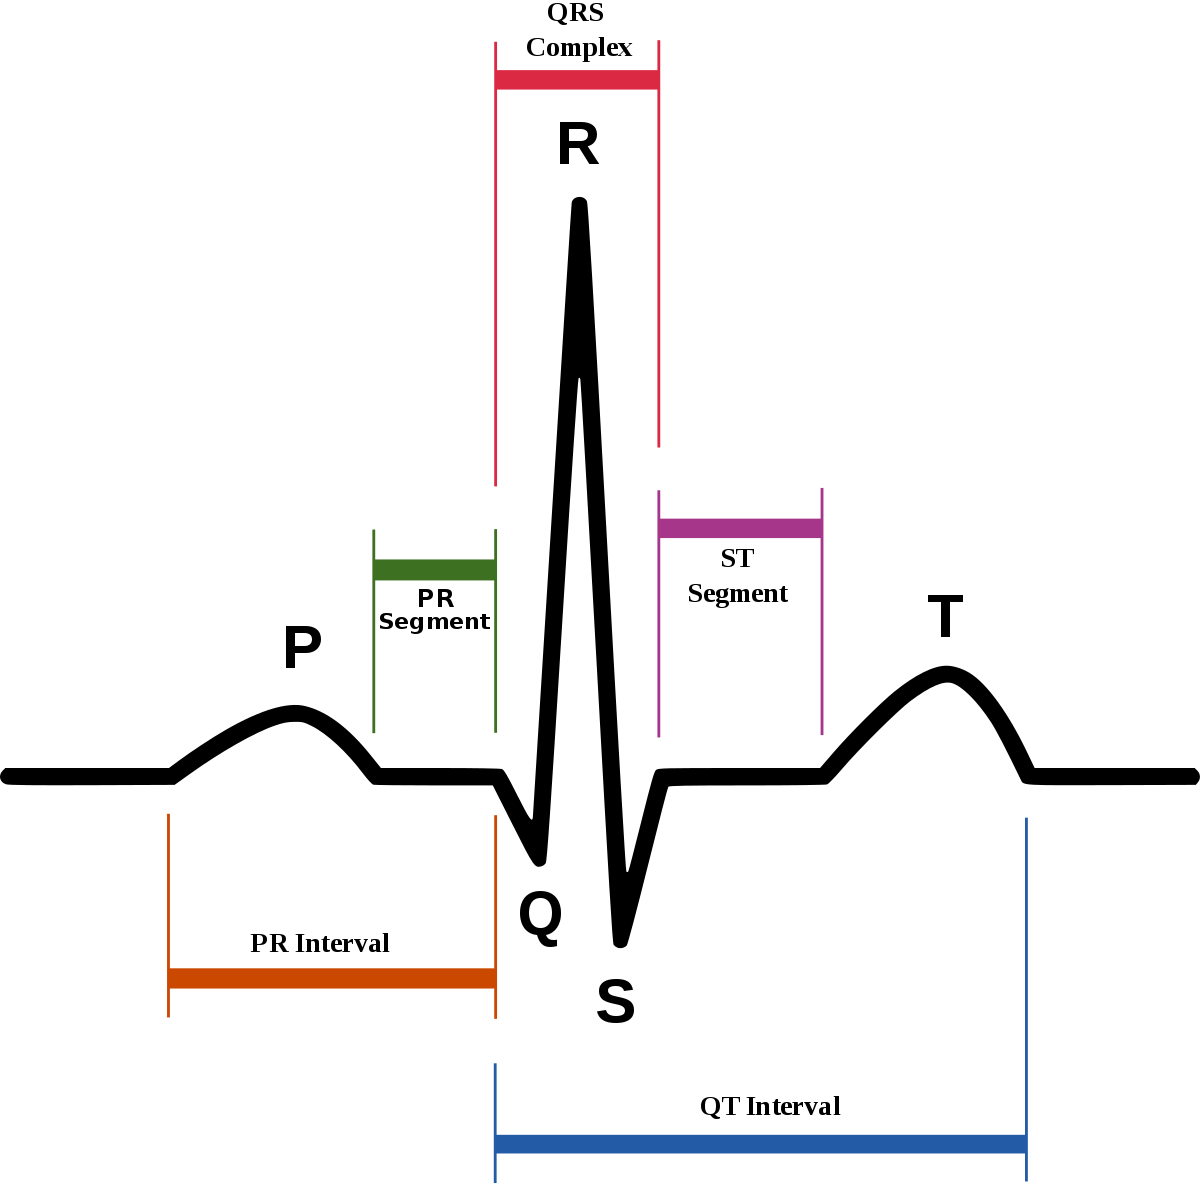

__ST Depression__

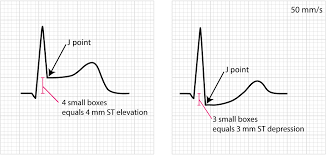

__ST Slope__

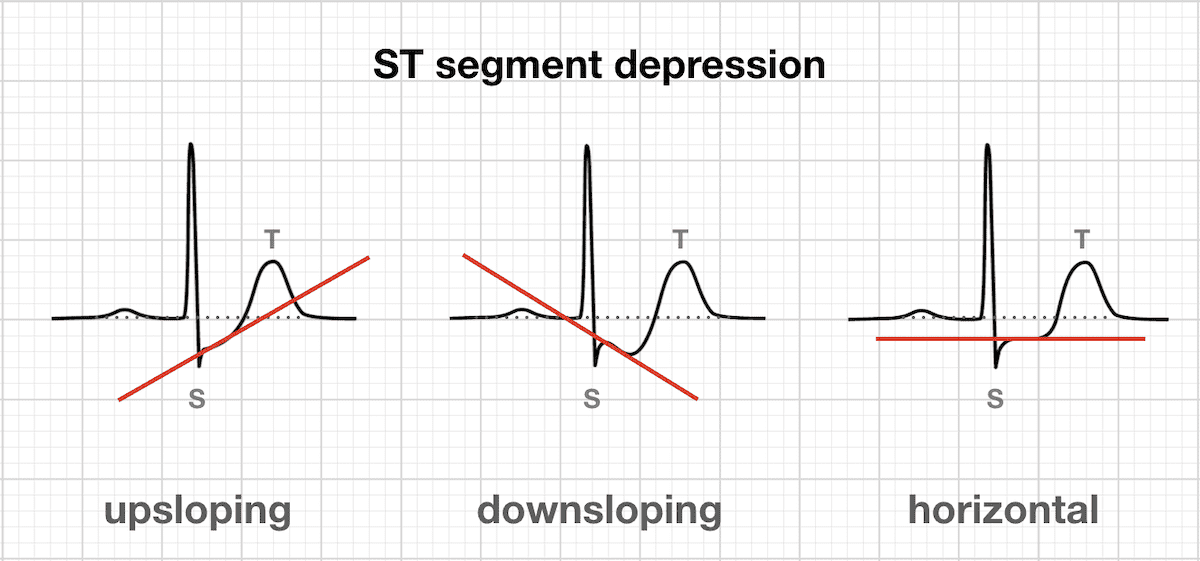

### Plot: Distribusi Data

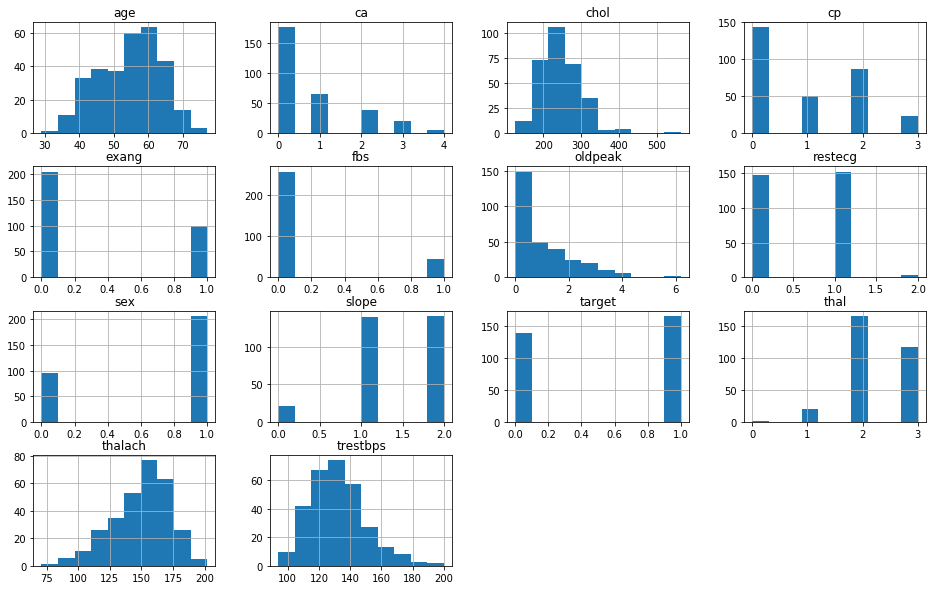

In [8]:
hist = df.hist(bins = 10, figsize=(16, 10))

### Plot: Distribusi Umur

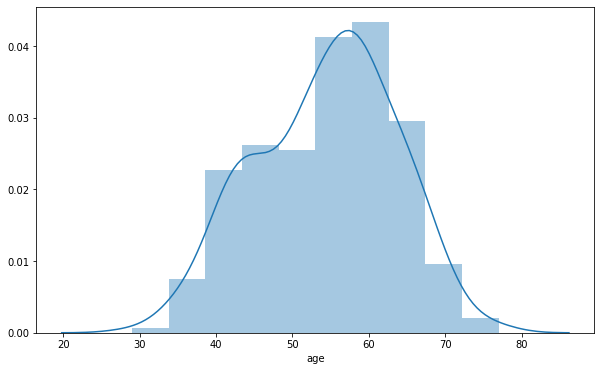

In [9]:
plt.figure(figsize=(10, 6))
sb.distplot(df['age'], bins=10)
plt.show()

In [10]:
print('Usia Maximum:', df['age'].max(), 'Tahun')
print('Usia Minimum:', df['age'].min(), 'Tahun')

Usia Maximum: 77 Tahun
Usia Minimum: 29 Tahun


### Plot: Distribusi data Heart Disease - Non Heart Disease

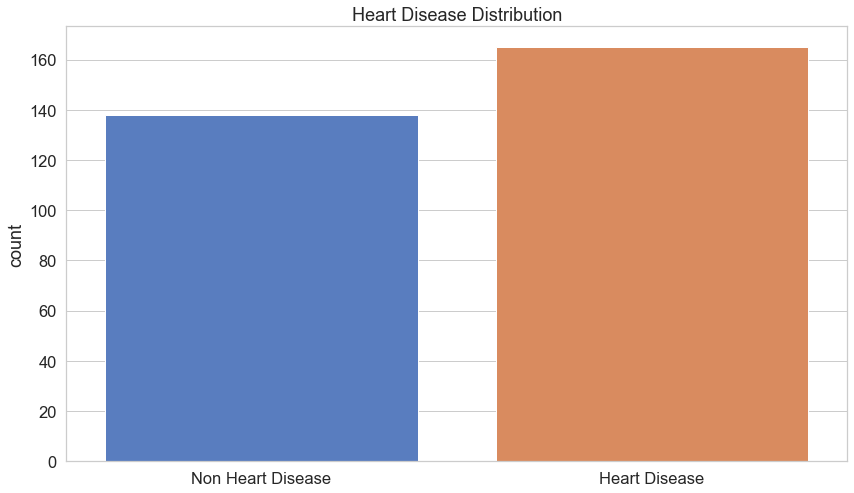

In [11]:
sb.set(style='whitegrid', palette='muted', font_scale=1.5)

plt.figure(figsize=(14, 8))
p = sb.countplot(x='target', data=df)
p.set_title("Heart Disease Distribution")
p.set_xticklabels(['Non Heart Disease', 'Heart Disease'])
plt.xlabel("");

### Plot: Distribusi data Gender - Heart Disease

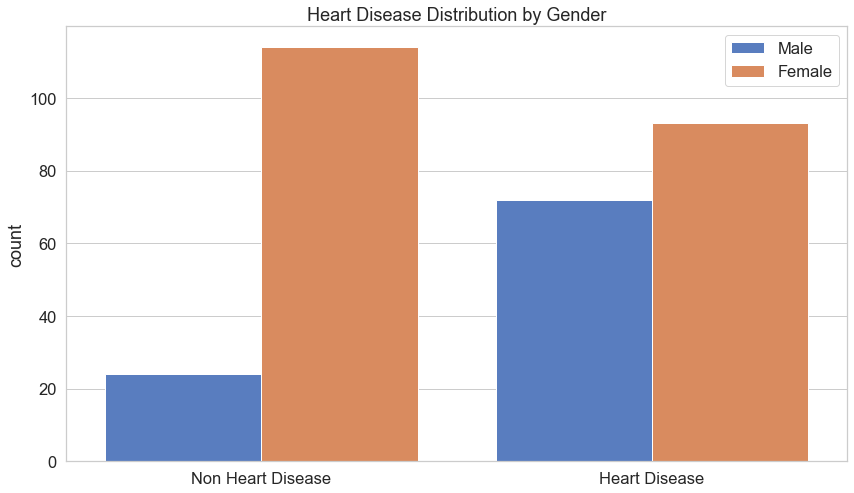

In [12]:
sb.set(style='whitegrid', palette='muted', font_scale=1.5)

plt.figure(figsize=(14, 8))
p = sb.countplot(x='target', data=df, hue='sex')
p.set_title("Heart Disease Distribution by Gender")
p.set_xticklabels(['Non Heart Disease', 'Heart Disease'])
plt.legend(['Male', 'Female'])
plt.xlabel("");

### Plot: Distribusi data Age - Heart Disease

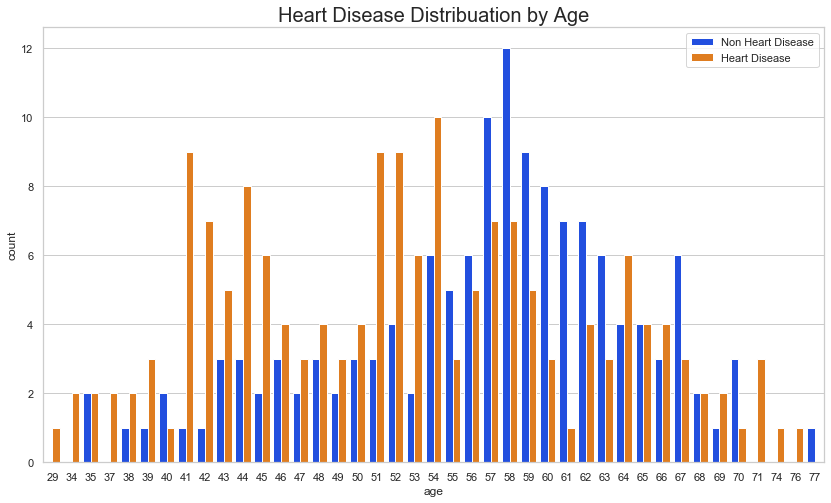

In [13]:
sb.set(style='whitegrid', palette='bright', font_scale=1)

plt.figure(figsize=(14, 8)) 
plt.title('Heart Disease Distribuation by Age', size=20)
sb.countplot(x='age', data=df, hue='target')
plt.legend(['Non Heart Disease', 'Heart Disease'], loc = 1)
plt.show()

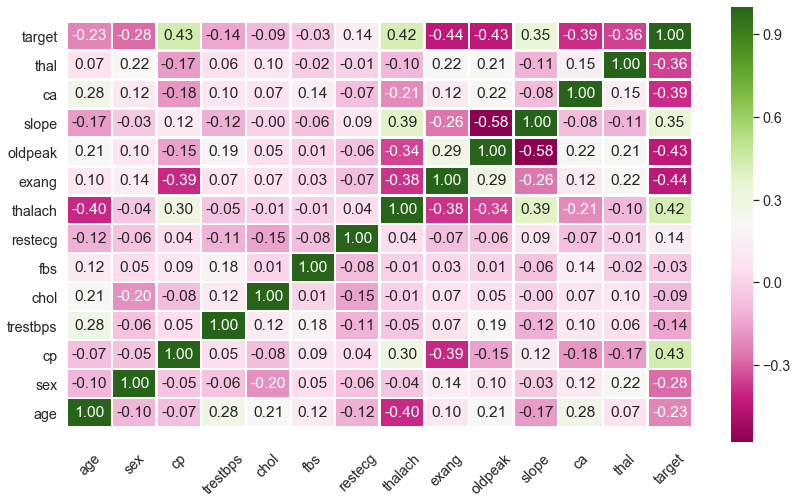

In [14]:
sb.set(style='whitegrid', palette='pastel', font_scale=1.3)

plt.figure(figsize=(14, 8))
hMap = sb.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', linewidths=1.5, cmap="PiYG")
hMap.set_xticklabels(hMap.get_xticklabels(), rotation=45); 
hMap.set_ylim(-0.5, 14.5)
plt.show()

### Drop Target

In [15]:
# Select the columns to use for prediction in the neural network
dfFeature = df.drop('target',axis=1)
dfTarget = df['target']

print(dfFeature.shape, dfTarget.shape)

(303, 13) (303,)


### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(dfFeature, dfTarget, test_size=0.2, 
                                                    random_state=42, shuffle=True)
print("Data Awal :", len(dfFeature))
print("Data Training :", len(x_train))
print("Data Test :", len(x_test))

Data Awal : 303
Data Training : 242
Data Test : 61


### Normalize using MinMaxScaler

In [42]:
scaler = MinMaxScaler()
x_train_scale = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scale)

x_test_scale = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scale)

print (x_train.shape, y_train.shape)
print (x_train.shape, y_test.shape)
print(x_train.head())

(242, 13) (242,)
(242, 13) (61,)
          0    1         2         3         4    5    6         7    8  \
0  0.270833  1.0  0.333333  0.265306  0.378753  0.0  0.5  0.649123  0.0   
1  0.604167  1.0  0.000000  0.571429  0.321016  0.0  0.0  0.201754  1.0   
2  0.354167  1.0  0.666667  0.571429  0.230947  0.0  0.5  0.517544  0.0   
3  0.541667  0.0  0.333333  0.418367  0.274827  0.0  0.0  0.640351  0.0   
4  0.645833  1.0  0.000000  0.234694  0.228637  1.0  0.5  0.631579  1.0   

          9   10   11        12  
0  0.000000  1.0  0.0  0.666667  
1  0.142857  1.0  0.0  1.000000  
2  0.642857  0.5  0.0  0.666667  
3  0.250000  0.5  0.0  0.666667  
4  0.250000  1.0  0.5  1.000000  


### Cek Coefficient tiap Feature

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
list_column = list(df.columns)
list_column.remove('target')
list_column

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [21]:
model = LogisticRegression(multi_class='auto', solver='liblinear')

In [22]:
model.fit(x_train, y_train)
y_prediksi = model.predict(x_test)

print('Akurasi Logistic Regression:', accuracy_score(y_test, y_prediksi)*100, '%')

Akurasi Logistic Regression: 88.52459016393442 %


In [23]:
array_coef = np.round(np.abs(model.coef_[0]), 4)
array_coef

array([0.3433, 1.2448, 1.7807, 0.6084, 0.2784, 0.1721, 0.6452, 1.3695,
       1.0679, 1.6063, 1.4008, 1.9762, 1.2574])

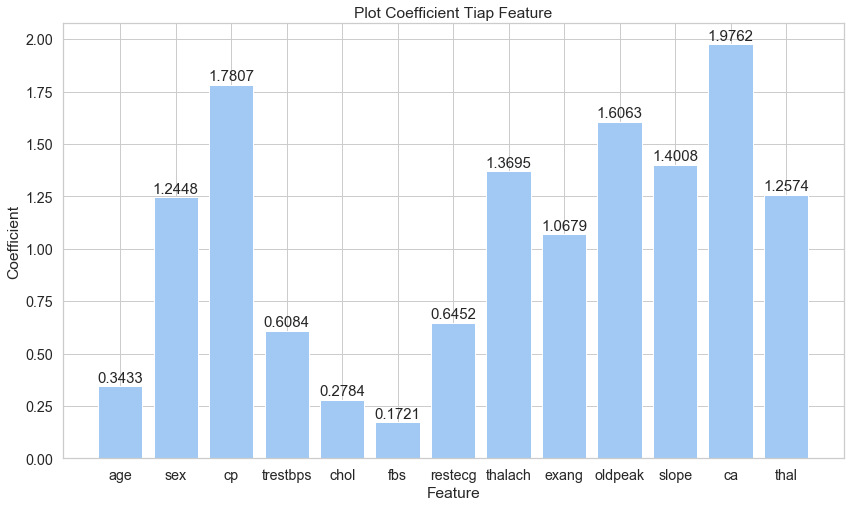

In [24]:
np.set_printoptions(precision=4)
plt.figure(figsize=(14, 8))
plt.bar(list_column, array_coef)
for i in range(len(list_column)):
    plt.text(i, array_coef[i]+0.04, array_coef[i], size=15,
            horizontalalignment='center',verticalalignment='center')

plt.xlabel('Feature')
plt.ylabel("Coefficient")  
plt.title('Plot Coefficient Tiap Feature')
plt.show()

### Beberapa Fungsi untuk membantu Training Model

In [25]:
# Define some useful callbacks
#Reduce learning rate when a metric has stopped improving.
reducelrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=30, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

# Stop training when a monitored quantity has stopped improving. 
# By default, mode is set to ‘auto‘ and knows that you want to minimize loss or maximize accuracy.
early_stopping_monitor=EarlyStopping(monitor='val_loss',verbose=1, patience=30, baseline=0.4, )

# Save the model after every epoch.
best_trained_model_file= 'best_trained_model.h5'
checkpoint = ModelCheckpoint(best_trained_model_file, verbose=0, monitor='val_loss',save_best_only=True, mode='auto')  

#place callbacks want to enable on this list
callbacks=[checkpoint, reducelrp]

### Training Model

In [26]:
model = Sequential()
model.add(Dense(12, input_dim=13, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="Adamax", metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                168       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 78        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(x_train, y_train, validation_split=0.33, epochs=100, batch_size=6, callbacks=callbacks,verbose=0)

### Evaluasi Model

In [28]:
model.evaluate(x_test, y_test)

61/61 [==============================] - 0s 169us/step


[0.3655506067100118, 0.8524590134620667]

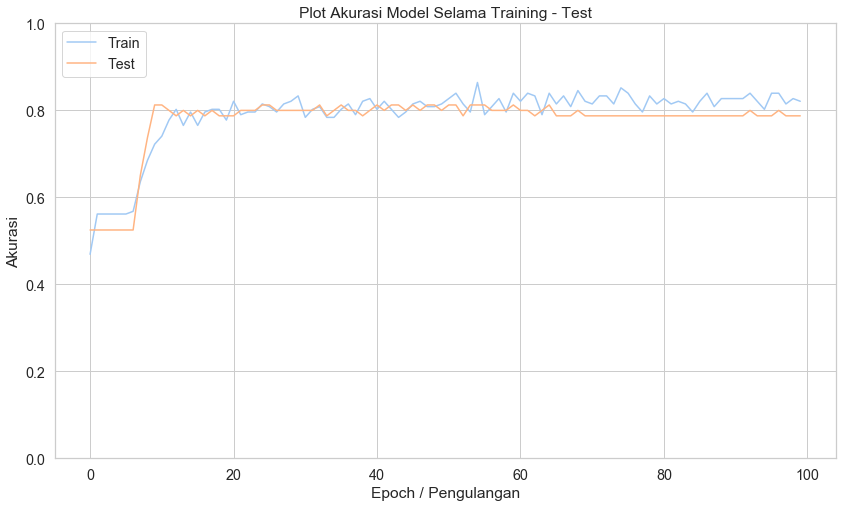

In [29]:
plt.figure(figsize=(14, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Plot Akurasi Model Selama Training - Test')
plt.ylabel('Akurasi')
plt.xlabel('Epoch / Pengulangan')
plt.ylim((0, 1))
plt.legend(['Train', 'Test'], loc=2);

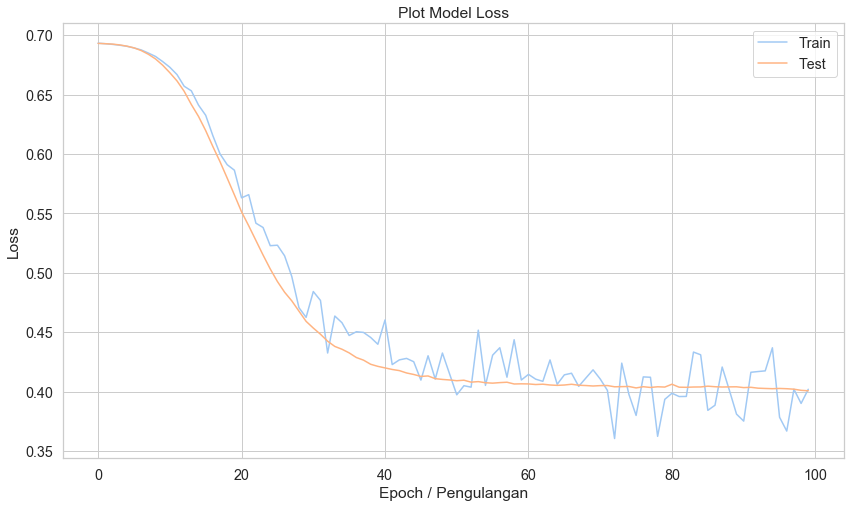

In [30]:
plt.figure(figsize=(14, 8))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch / Pengulangan')
plt.legend(['Train', 'Test'], loc=1)
plt.show()

In [31]:
from sklearn.metrics import accuracy_score

print("Model prediction test")

# Prediksi Class
y_pred_class = model.predict_classes(x_test)

# Probability
y_pred_proba = model.predict(x_test)

print (" Actual Class | Predicted Class | Probability  ")
for index, label in enumerate(y_test):
    print ("%s     | %s  | %s |   %.2f%%" % (str(index), str(label), str(y_pred_class[index]), float(y_pred_proba[index])*100))

# Accuracy Score
print ("Skor akurasi dengan keras: %.2f%%" %  (accuracy_score(y_test, y_pred_class)*100))

Model prediction test
 Actual Class | Predicted Class | Probability  
0     | 0  | [0] |   11.37%
1     | 0  | [1] |   79.99%
2     | 1  | [1] |   91.28%
3     | 0  | [0] |   11.63%
4     | 1  | [1] |   93.18%
5     | 1  | [1] |   90.68%
6     | 1  | [1] |   70.41%
7     | 0  | [0] |   4.15%
8     | 0  | [0] |   4.09%
9     | 1  | [0] |   38.99%
10     | 1  | [1] |   78.76%
11     | 1  | [0] |   12.74%
12     | 1  | [1] |   91.60%
13     | 0  | [0] |   9.39%
14     | 1  | [1] |   96.16%
15     | 1  | [1] |   89.65%
16     | 1  | [1] |   96.41%
17     | 0  | [0] |   22.29%
18     | 0  | [0] |   5.88%
19     | 0  | [0] |   4.56%
20     | 1  | [1] |   71.89%
21     | 0  | [0] |   6.51%
22     | 0  | [0] |   31.90%
23     | 1  | [1] |   92.67%
24     | 1  | [1] |   93.74%
25     | 0  | [1] |   88.92%
26     | 0  | [1] |   88.34%
27     | 1  | [0] |   46.48%
28     | 0  | [0] |   10.81%
29     | 1  | [1] |   91.71%
30     | 1  | [0] |   9.34%
31     | 0  | [0] |   7.95%
32     | 0  | [0] | 

### Classification Report

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Confusion Matrix 

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[25,  4],
       [ 5, 27]])

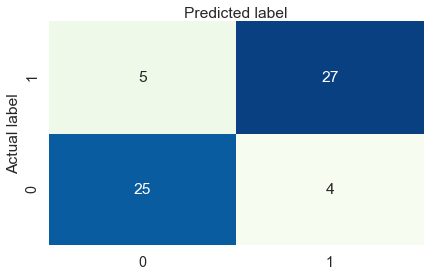

In [36]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sb.heatmap(pd.DataFrame(cm),annot=True,cmap="GnBu",fmt="d",cbar=False)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label');
plt.ylim(0, 2)
plt.show()

- __True Positive (TP)__: prediksi __1__, aktual __1__
- __True Negative (TN)__: prediksi __0__, aktual __0__
- __False Positif (FP)__: prediksi __1__, aktual __0__
- __False Negatif (FN)__: prediksi __0__, aktual __1__

-|pred "Yes"|pred "No"
---|---|---
__aktual "Yes"__|__TP = 27__|__FN = 5__
__aktual "No"__|__FP = 4__|__TN = 25__

### Save and Export Model

In [37]:
# save trained model
trained_model_file="./model2/trained_heart_model.h5"
model.save(trained_model_file)
print("Saved trained model to disk as h5 file :", trained_model_file)

Saved trained model to disk as h5 file : ./model2/trained_heart_model.h5


### Save and Export Scaler

In [38]:
from pickle import dump
scaler.fit(dfFeature)
dump(scaler, open('scaler.pkl', 'wb'))